# Introduction

Analyzing the effects of various features on 2015 Kings County housing prices using Linear Regression Modeling.
Specifically looking at effects on Price Per Square Foot (PSF).
PSF is another measure of value in addition to just overall price.

# Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#Importing model function from class
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [3]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')

# Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Visualizations

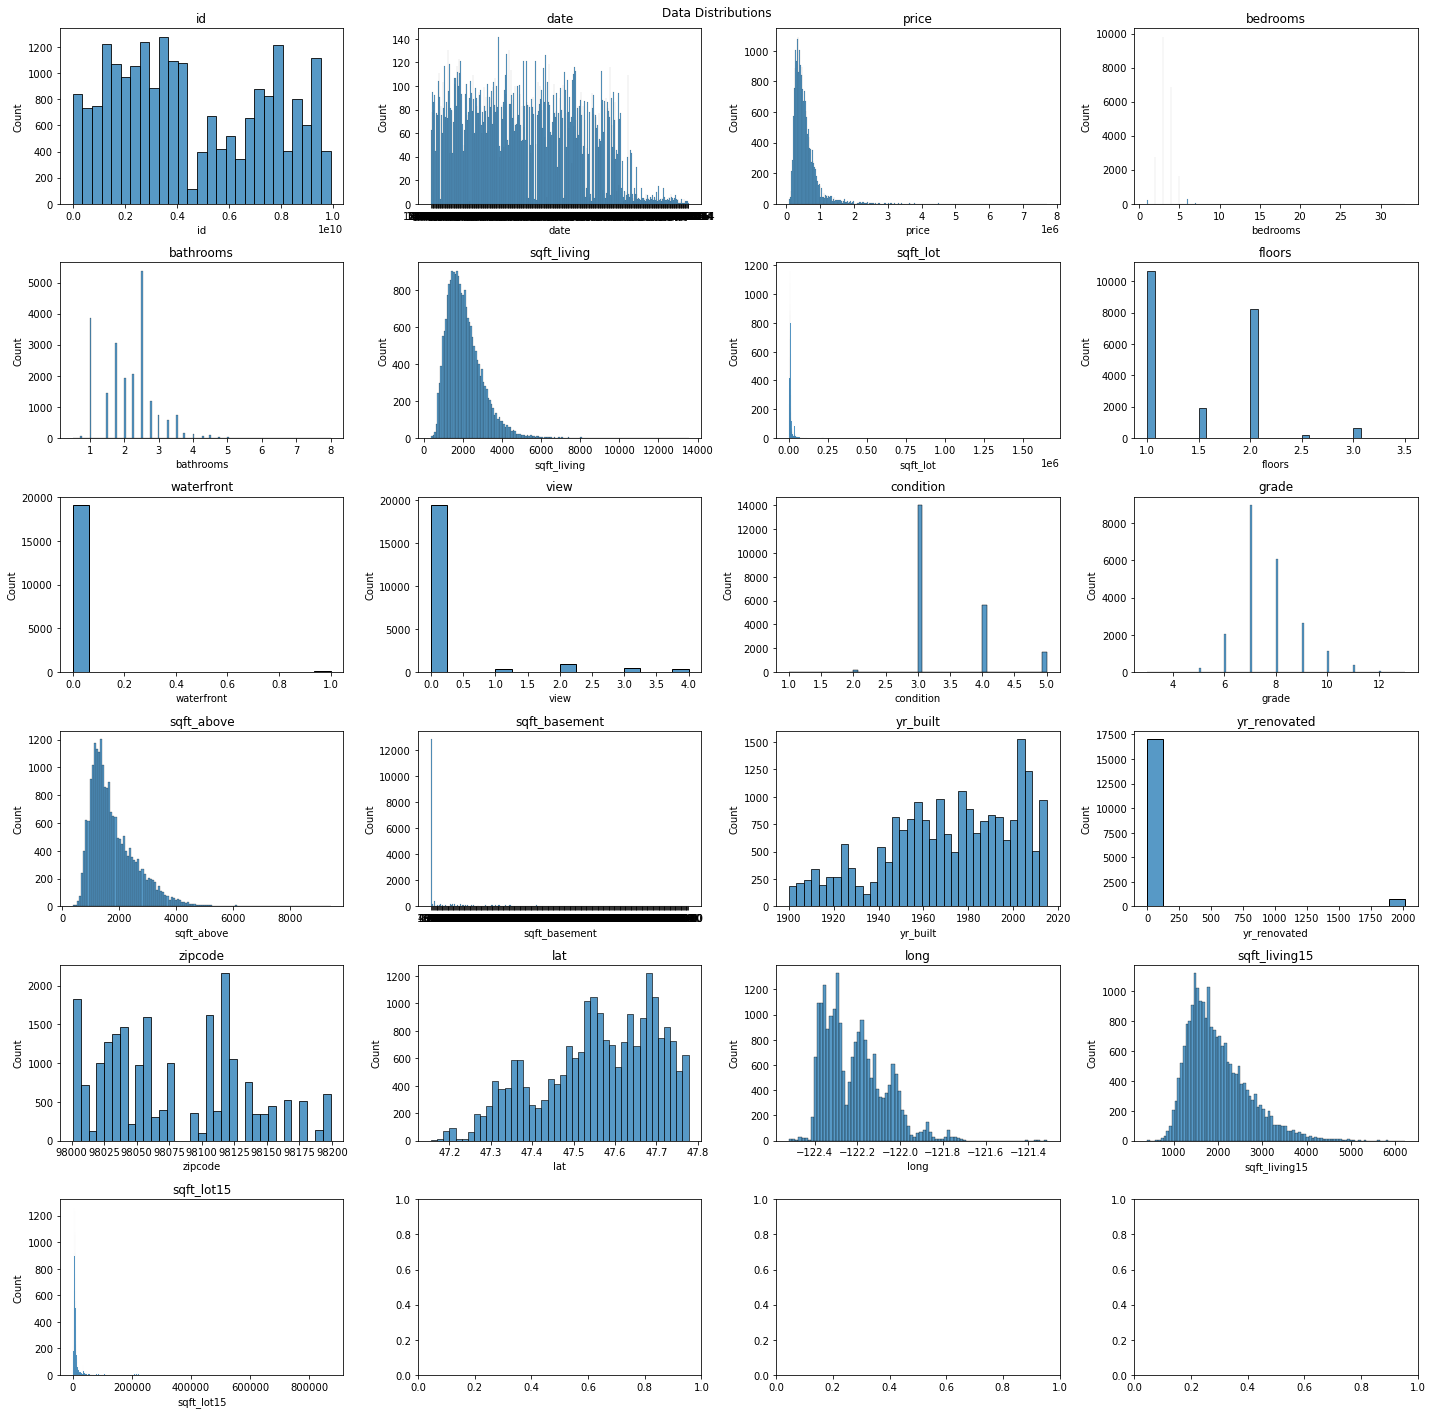

In [8]:
# Looking at the distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=6)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

## Findings

* Many of the distributions are skewed to the right with strong outliers
* Other features do not make sense to analyze numerically such as: id, date, zipcodes
* A few others need additional exploration such as: basement sqft, year renovated that also have large 0 value counts

In [9]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

#columns to be dropped
dropped_columns = ['id','date','view','sqft_living15','sqft_lot15','zipcode', 'lat','long']

# Data Cleaning

## Dropping Unwanted Columns

In [10]:
cleaned_df = df.drop(dropped_columns,axis=1)

In [11]:
cleaned_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

## Filling NA values with 0

In [12]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842


In [13]:
cleaned_df = cleaned_df.fillna(0)

In [14]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0


## Converting Basement SqFt to Float

In [15]:
cleaned_df = cleaned_df.replace(to_replace='?',value=0)

In [16]:
cleaned_df['sqft_basement'] = cleaned_df.sqft_basement.astype(float)

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


# Generating and Modifying Features

In [18]:
mod_df = cleaned_df.copy()

## Price Per Square Foot (PSF) Using Sqft_Above

In [19]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

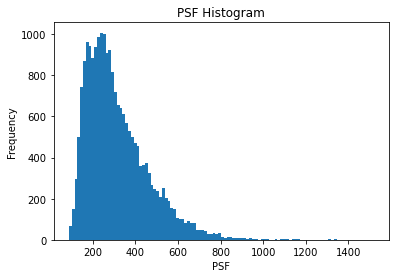

In [20]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

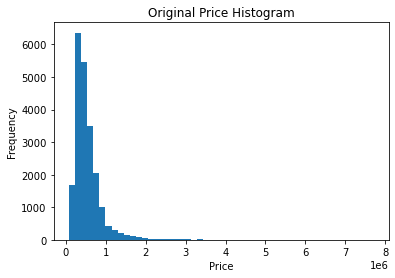

In [21]:
plt.hist(mod_df['price'], bins=50);
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

* PSF appears more normally distributed than original price, 
  but distribution remains skewed towards higher PSF

## Living to Lot Sqft Ratio

In [22]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

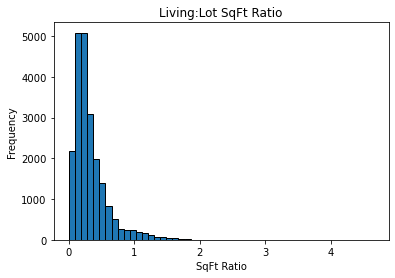

In [23]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Categorical Changes

### Basement Sqft to Categorical (Yes or No)

In [24]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [25]:
mod_df['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

### Renovation Year to Categorical (Recent Reno or None)

In [26]:
# Using 27 years as a cutoff between recent renovations
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [27]:
mod_df['rec_reno'].value_counts()

0    21055
1      542
Name: rec_reno, dtype: int64

# Modified Features Exploration

## Dropping Unused Columns

In [28]:
processed = mod_df.copy()

In [29]:
processed.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'psf', 'livtolot', 'has_basement',
       'rec_reno'],
      dtype='object')

In [30]:
modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']

In [31]:
processed = processed.drop(modded_cols, axis =1)

In [32]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

## Linearity Checks

In [33]:
len(processed.columns)

11

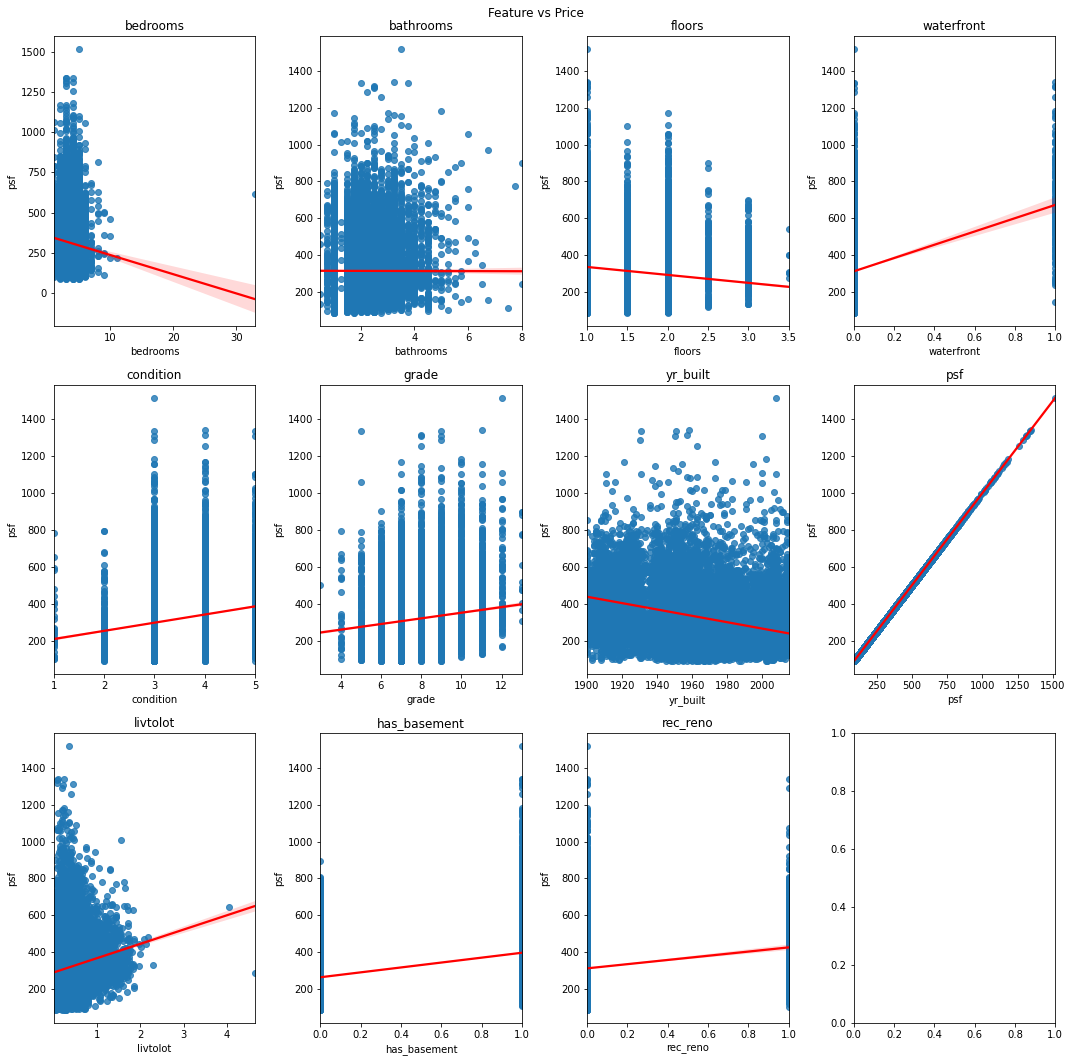

In [34]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

#### Removing Erroneous Looking Bedroom Value

In [35]:
processed = processed.drop(processed.loc[processed.bedrooms > 30].index)

#### Removing Large Liv to Lot Values

In [36]:
processed = processed.drop(processed.loc[processed.livtolot > 4].index)

## Second Linearity Checks

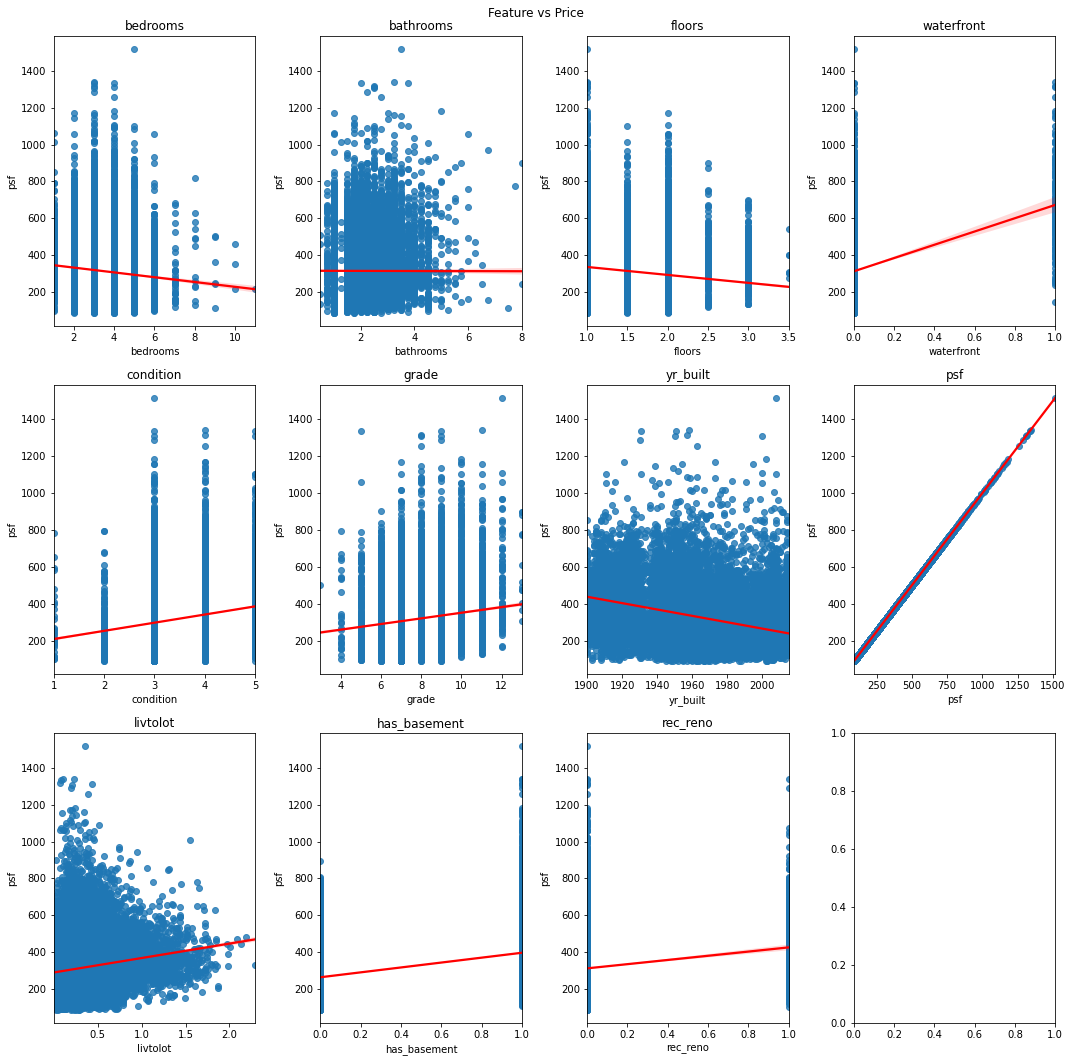

In [37]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

### Findings

* Many of the features do not appear strongly lineary related to PSF
* Considering transformations to improve R Squared after initial analysis

## MultiCollinearity

In [38]:
processed.corr()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
bedrooms,1.000000,0.527960,0.183948,-0.002058,0.023418,0.366487,0.160948,-0.079863,0.028521,0.160524,0.031583
bathrooms,0.527960,1.000000,0.502606,0.063629,-0.126446,0.665893,0.507177,-0.001636,0.290111,0.159860,0.068414
floors,0.183948,0.502606,1.000000,0.020808,-0.263984,0.458587,0.489176,-0.157900,0.560918,-0.252647,0.007530
waterfront,-0.002058,0.063629,0.020808,1.000000,0.016655,0.082842,-0.024499,0.200305,-0.030009,0.039230,0.048175
condition,0.023418,-0.126446,-0.263984,0.016655,1.000000,-0.146818,-0.361657,0.195487,-0.157287,0.130444,-0.072412
grade,0.366487,0.665893,0.458587,0.082842,-0.146818,1.000000,0.447779,0.121800,0.192043,0.050561,0.037720
yr_built,0.160948,0.507177,0.489176,-0.024499,-0.361657,0.447779,1.000000,-0.344073,0.283016,-0.164159,-0.155568
psf,-0.079863,-0.001636,-0.157900,0.200305,0.195487,0.121800,-0.344073,1.000000,0.141329,0.438232,0.120538
livtolot,0.028521,0.290111,0.560918,-0.030009,-0.157287,0.192043,0.283016,0.141329,1.000000,0.153518,0.013344
has_basement,0.160524,0.159860,-0.252647,0.039230,0.130444,0.050561,-0.164159,0.438232,0.153518,1.000000,0.049459


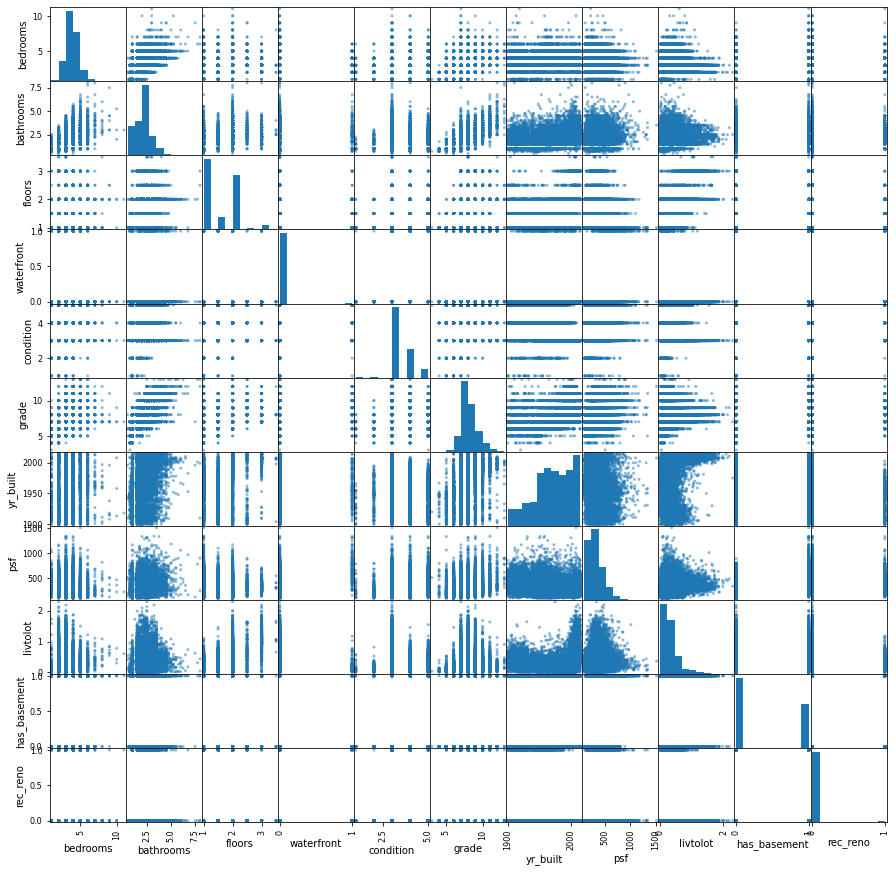

In [39]:
pd.plotting.scatter_matrix(processed, figsize = [15,15]);

### Findings

* There aren't any strong multicollinear features present
* Need to keep an eye on the relationship between bathrooms, floors, grade, and year built

## Last Look at Features Before Modeling

In [40]:
processed.describe()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
count,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000
mean,3.371863,2.115842,1.494049,0.006761,3.409790,7.657822,1971.002223,314.904107,0.323385,0.385061,0.025100
std,0.904097,0.769025,0.539612,0.081950,0.650489,1.173044,29.371585,147.433804,0.265645,0.486621,0.156431
min,1.000000,0.500000,1.000000,0.000000,1.000000,3.000000,1900.000000,87.588235,0.000610,0.000000,0.000000
25%,3.000000,1.750000,1.000000,0.000000,3.000000,7.000000,1951.000000,206.487284,0.156620,0.000000,0.000000
50%,3.000000,2.250000,1.500000,0.000000,3.000000,7.000000,1975.000000,280.339479,0.247641,0.000000,0.000000
75%,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,1997.000000,391.414015,0.407538,1.000000,0.000000
max,11.000000,8.000000,3.500000,1.000000,5.000000,13.000000,2015.000000,1516.746411,2.291399,1.000000,1.000000


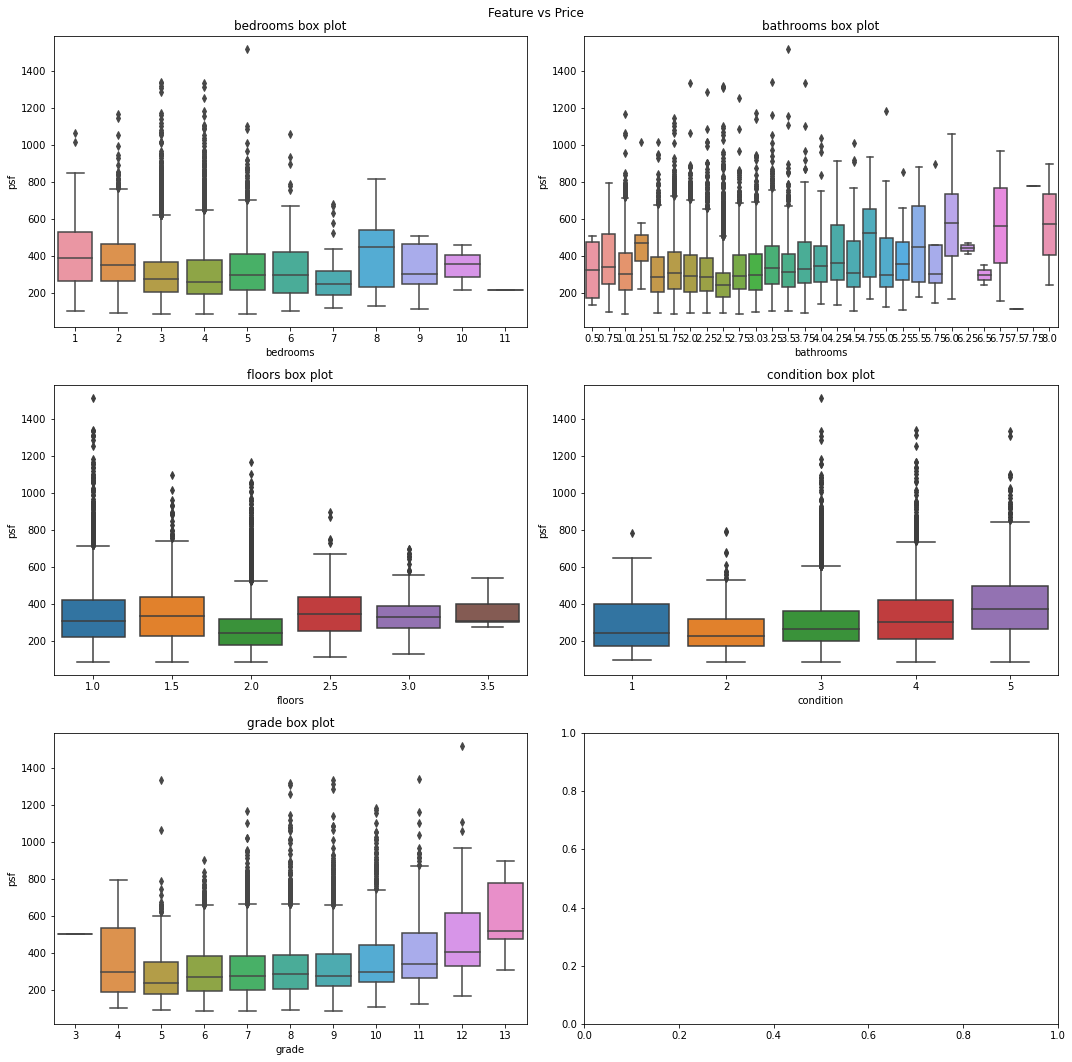

In [41]:
cat_columns = ['bedrooms','bathrooms','floors','condition','grade']
fig, axes = plt.subplots(figsize=(15,15),ncols=2,nrows=3)
for i in range(len(cat_columns)):
    col = cat_columns[i]
    y = i%2
    x = i//2
    ax = axes[x,y]
    
    sns.boxplot(x=col, y='psf', data=processed, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

# Initial Regression Modeling

In [42]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

In [43]:
x = processed[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Model Summary

In [44]:
initial_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.4212415058789738
Test R2:  0.4570716425720759
Train RMSE:  111.79905773754315
Test RMSE:  110.01625880936528


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     1257.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:27   Log-Likelihood:            -1.0599e+05
No. Observations:               17275   AIC:                         2.120e+05
Df Residuals:                   17264   BIC:                         2.121e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3881.9092     77.829     49.877      0.000    3729.356    4034.463
bedrooms       -29.9353      1.141    -26.245      0.000     -32.171     -27.700
bathrooms        1.8847      1.875      1.005      0.315      -1.790       5.559
floors         -39.4657      2.563    -15.399      0.000     -44.489     -34.442
waterfront     271.6134     10.574     25.687      0.000     250.887     292.340
condition       17.0562      1.435     11.882      0.000      14.242      19.870
grade           45.3476      1.013     44.763      0.000      43.362      47.333
yr_built        -1.9766      0.040    -49.874      0.000      -2.054      -1.899
livtolot       133.4601      4.319     30.898      0.000     124.994     141.927
has_basement    87.0963      2.145     40.601      0.000      82.892      91.301
rec_reno        27.3812      5.642      4.853      0.000      16.322      38.440
==============================================================================
Omnibus:                     3868.011   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13853.413
Skew:                           1.100   Prob(JB):                         0.00
Kurtosis:                       6.796   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dropping High P Values

In [45]:
x_bath = x.drop('bathrooms', axis = 1)

### Model Summary Update

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_bath,y,test_size=0.2)
initial_model2 = model(x_train,x_test,y_train,y_test);

Train R2:  0.42604165938727434
Test R2:  0.43804494786223314
Train RMSE:  111.37655623094666
Test RMSE:  111.7448856774163


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1424.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:28   Log-Likelihood:            -1.0593e+05
No. Observations:               17275   AIC:                         2.119e+05
Df Residuals:                   17265   BIC:                         2.120e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3818.3857     72.304     52.810      0.000    3676.662    3960.110
bedrooms       -29.7803      1.034    -28.801      0.000     -31.807     -27.754
floors         -38.2370      2.471    -15.477      0.000     -43.079     -33.395
waterfront     283.6183     10.747     26.391      0.000     262.554     304.683
condition       15.8361      1.429     11.082      0.000      13.035      18.637
grade           45.3280      0.920     49.295      0.000      43.526      47.130
yr_built        -1.9416      0.037    -52.210      0.000      -2.015      -1.869
livtolot       130.3404      4.265     30.562      0.000     121.981     138.700
has_basement    89.8129      2.068     43.420      0.000      85.759      93.867
rec_reno        38.5958      5.580      6.917      0.000      27.659      49.533
==============================================================================
Omnibus:                     3730.835   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12749.282
Skew:                           1.076   Prob(JB):                         0.00
Kurtosis:                       6.617   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions Check

### Normality

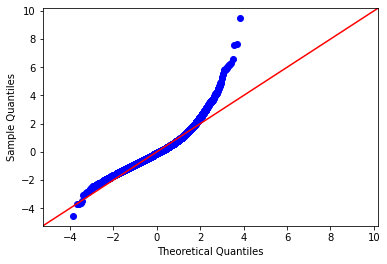

In [47]:
initial_residuals = initial_model2.resid
fig = sm.graphics.qqplot(initial_residuals,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

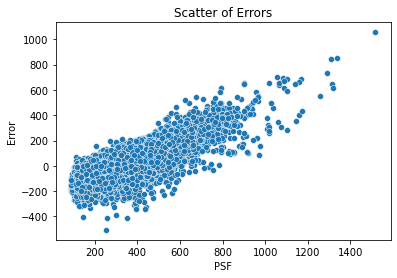

In [48]:
sns.scatterplot(y_train,initial_residuals)
plt.title('Scatter of Errors')
plt.xlabel('PSF')
plt.ylabel('Error');

## Findings

* Benchmark R-Squared is .426.  Difference in Train and Test R-Squared is .012
* RMSE is is 111 PSF.  For reference, mean PSF is 315 PSF and STD is 147 PSF.
* RMSE difference between Train and Test is low at ~.4 PSF 
* PSF ranges from 87 - 1,517 PSF
* Distribution of Residuals are skewed to the right
* Fails homoscedasticity check, higher PSF are largely underpredicted and lower PSF overpredicted

# Iteration 2: Log Transforms

## Log Transformation

In [49]:
log_df = processed.drop('bathrooms',axis=1)

In [50]:
log_cont = ['bedrooms','floors','condition','grade','yr_built','psf','livtolot']

In [51]:
for cat in log_cont:
    log_df[cat] = np.log(log_df[cat])

In [52]:
log_df.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
0,1.098612,0.000000,0.0,1.098612,1.945910,7.578145,5.236712,-1.566141,0,0
1,1.098612,0.693147,0.0,1.098612,1.945910,7.576097,5.513131,-1.035992,1,1
2,0.693147,0.000000,0.0,1.098612,1.791759,7.566828,5.454322,-2.563950,0,0
3,1.386294,0.000000,0.0,1.609438,1.945910,7.583248,6.354784,-0.936493,1,0
4,1.098612,0.000000,0.0,1.098612,2.079442,7.594381,5.715617,-1.570598,0,0


## Updating Model Function

In [53]:
# Updating model function to reverse log transform
def model_log(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

## Model Summary

In [54]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = log_df[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model_log(x_train,x_test,y_train,y_test);

Train R2:  0.4173185996428047
Test R2:  0.41213020365529196
Train RMSE:  113.89902940715655
Test RMSE:  112.89151420098794


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     1374.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:28   Log-Likelihood:                -5739.7
No. Observations:               17275   AIC:                         1.150e+04
Df Residuals:                   17265   BIC:                         1.158e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       85.3643      1.658     51.498      0.000      82.115      88.613
bedrooms        -0.3929      0.010    -38.724      0.000      -0.413      -0.373
floors          -0.0832      0.010     -8.152      0.000      -0.103      -0.063
waterfront       0.5298      0.033     16.213      0.000       0.466       0.594
condition        0.1729      0.015     11.169      0.000       0.143       0.203
grade            1.0765      0.022     48.333      0.000       1.033       1.120
yr_built       -10.7622      0.220    -48.976      0.000     -11.193     -10.331
livtolot         0.0665      0.003     19.237      0.000       0.060       0.073
has_basement     0.3254      0.006     54.047      0.000       0.314       0.337
rec_reno         0.0909      0.017      5.369      0.000       0.058       0.124
==============================================================================
Omnibus:                       46.918   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.731
Skew:                          -0.037   Prob(JB):                     1.76e-13
Kurtosis:                       3.276   Cond. No.                     5.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform Features

In [55]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.420129432099969
Test R2:  0.4095458604807434
Train RMSE:  112.36241393380803
Test RMSE:  112.90125703905446


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1390.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:28   Log-Likelihood:            -1.0608e+05
No. Observations:               17275   AIC:                         2.122e+05
Df Residuals:                   17265   BIC:                         2.123e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.696e+04    555.474     48.528      0.000    2.59e+04     2.8e+04
bedrooms      -118.8244      3.375    -35.210      0.000    -125.439    -112.210
floors         -30.7592      3.403     -9.040      0.000     -37.428     -24.090
waterfront     279.7246     10.560     26.490      0.000     259.027     300.423
condition       63.6972      5.147     12.374      0.000      53.608      73.787
grade          349.4049      7.428     47.038      0.000     334.845     363.965
yr_built     -3595.9218     73.628    -48.839      0.000   -3740.241   -3451.603
livtolot        25.9326      1.154     22.471      0.000      23.671      28.195
has_basement   101.6585      2.009     50.599      0.000      97.720     105.596
rec_reno        27.7688      5.537      5.015      0.000      16.915      38.622
==============================================================================
Omnibus:                     3612.240   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12246.040
Skew:                           1.045   Prob(JB):                         0.00
Kurtosis:                       6.557   Cond. No.                     5.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform PSF

In [56]:
x_log2 = processed[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log2 = log_df[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_log2,y_log2,test_size=0.2)
log_model2 = model_log(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.42821870414753327
Test R2:  0.4327931136077602
Train RMSE:  113.4391113916339
Test RMSE:  110.93746494002949


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1437.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:28   Log-Likelihood:                -5643.1
No. Observations:               17275   AIC:                         1.131e+04
Df Residuals:                   17265   BIC:                         1.138e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.2702      0.218     74.531      0.000      15.842      16.698
bedrooms        -0.0997      0.003    -31.797      0.000      -0.106      -0.094
floors          -0.1143      0.007    -15.358      0.000      -0.129      -0.100
waterfront       0.5267      0.031     16.833      0.000       0.465       0.588
condition        0.0484      0.004     11.238      0.000       0.040       0.057
grade            0.1399      0.003     50.268      0.000       0.134       0.145
yr_built        -0.0059      0.000    -52.346      0.000      -0.006      -0.006
livtolot         0.3981      0.013     30.867      0.000       0.373       0.423
has_basement     0.2898      0.006     46.510      0.000       0.278       0.302
rec_reno         0.0504      0.017      2.989      0.003       0.017       0.083
==============================================================================
Omnibus:                       36.019   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.001
Skew:                          -0.041   Prob(JB):                     4.60e-10
Kurtosis:                       3.230   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Log transforming PSF yielded best results along with no high p values

## Assumptions Check

### Normality

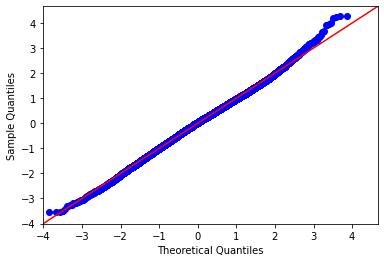

In [58]:
log_residuals2 = log_model2.resid
fig = sm.graphics.qqplot(log_residuals2,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

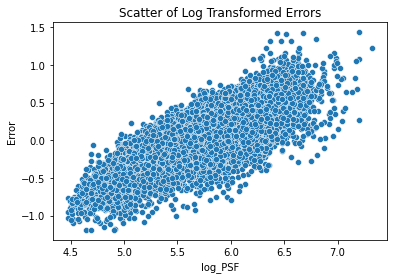

In [59]:
sns.scatterplot(y_train2,log_residuals2)
plt.title('Scatter of Log Transformed Errors')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared is worse at .428 after log transforming just PSF
* RMSE is also worse at 113 PSF
* Difference in RMSE is low at 2.5 PSF
* Distribution of residuals is close to normal
* Still fails homoscedasticity.  However, appears more randomly distributed

# Iteration 3: Adding Back ZipCodes

* Considered adding back some location features to see the effects on the model

## Re-updating DataFrame and Cleaning

In [60]:
dropped_columns2 = ['id','date','view','sqft_living15','sqft_lot15','bathrooms', 'lat','long']

In [61]:
df_zip = df.drop(dropped_columns2,axis=1)

In [62]:
df_zip.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [63]:
# Handling NA Values
df_zip = df_zip.fillna(0)
df_zip = df_zip.replace(to_replace='?',value=0)

# Feature Generation and Modifications
df_zip['sqft_basement'] = df_zip.sqft_basement.astype(float)
df_zip['psf'] = df_zip['price'] / df_zip['sqft_above']
df_zip['livtolot'] = df_zip['sqft_living']/df_zip['sqft_lot']
df_zip['has_basement'] = df_zip['sqft_basement'] > 0
df_zip['has_basement'] = df_zip['has_basement'].astype(int)
df_zip['rec_reno'] = (df_zip['yr_renovated'] > 1988).astype(int)

modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']
df_zip = df_zip.drop(modded_cols, axis =1)

# Removing Extreme Values
df_zip = df_zip.drop(df_zip.loc[df_zip.bedrooms > 30].index)
df_zip = df_zip.drop(df_zip.loc[df_zip.livtolot > 4].index)

In [64]:
df_zip.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,zipcode,psf,livtolot,has_basement,rec_reno
0,3,1.0,0.0,3,7,1955,98178,188.050847,0.208850,0,0
1,3,2.0,0.0,3,7,1951,98125,247.926267,0.354874,1,1
2,2,1.0,0.0,3,6,1933,98028,233.766234,0.077000,0,0
3,4,1.0,0.0,5,7,1965,98136,575.238095,0.392000,1,0
4,3,1.0,0.0,3,8,1987,98074,303.571429,0.207921,0,0


## Creating Dummy Variables for Zipcodes

In [65]:
dummy_zips = pd.get_dummies(df_zip['zipcode'], prefix='zip', drop_first=True)
df_zip = pd.concat([df_zip, dummy_zips], axis=1)

In [66]:
df_zip = df_zip.drop('zipcode', axis=1)

## Model Summary

In [67]:
x_zip = df_zip.drop('psf',axis=1)
y_zip = df_zip[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_zip,y_zip,test_size=0.2)
zip_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.7164215145187764
Test R2:  0.7161665912132147
Train RMSE:  78.53098774490051
Test RMSE:  78.45022949381573


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     557.0
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:29   Log-Likelihood:                -99892.
No. Observations:               17275   AIC:                         1.999e+05
Df Residuals:                   17196   BIC:                         2.006e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      102.2734     68.621      1.490      0.136     -32.230     236.777
bedrooms       -20.2646      0.758    -26.743      0.000     -21.750     -18.779
floors         -42.3353      1.787    -23.694      0.000     -45.837     -38.833
waterfront     329.7361      7.357     44.818      0.000     315.315     344.157
condition       18.8796      1.046     18.053      0.000      16.830      20.929
grade           13.1524      0.733     17.933      0.000      11.715      14.590
yr_built         0.0134      0.035      0.383      0.701      -0.055       0.082
livtolot       -35.4973      3.736     -9.500      0.000     -42.821     -28.174
has_basement    74.4948      1.495     49.814      0.000      71.563      77.426
rec_reno        37.0709      4.026      9.208      0.000      29.179      44.962
zip_98002       -4.7654      7.721     -0.617      0.537     -19.900      10.369
zip_98003       -3.6154      7.049     -0.513      0.608     -17.433      10.202
zip_98004      366.8351      6.978     52.571      0.000     353.158     380.513
zip_98005      184.3156      8.208     22.455      0.000     168.226     200.405
zip_98006      178.9293      6.181     28.951      0.000     166.815     191.044
zip_98007      160.9374      8.724     18.449      0.000     143.838     178.036
zip_98008      171.3178      6.992     24.503      0.000     157.613     185.022
zip_98010       57.7739      9.920      5.824      0.000      38.329      77.218
zip_98011       90.2641      7.876     11.460      0.000      74.826     105.702
zip_98014       61.6667      9.268      6.654      0.000      43.500      79.833
zip_98019       66.2969      7.695      8.615      0.000      51.213      81.380
zip_98022       11.7423      7.427      1.581      0.114      -2.816      26.301
zip_98023      -14.8541      6.177     -2.405      0.016     -26.961      -2.747
zip_98024       90.3955     11.117      8.131      0.000      68.605     112.186
zip_98027      118.3069      6.399     18.490      0.000     105.765     130.849
zip_98028       89.6287      6.983     12.836      0.000      75.942     103.315
zip_98029      142.4028      6.795     20.956      0.000     129.083     155.722
zip_98030        6.8310      7.174      0.952      0.341      -7.230      20.892
zip_98031       12.1806      7.098      1.716      0.086      -1.733      26.094
zip_98032      -10.1428      9.228     -1.099      0.272     -28.231       7.945
zip_98033      221.1799      6.310     35.055      0.000     208.813     233.547
zip_98034      130.2694      5.970     21.822      0.000     118.568     141.971
zip_98038       41.4604      5.946      6.973      0.000      29.806      53.115
zip_98039      485.8369     13.541     35.879      0.000     459.295     512.379
zip_98040      281.6083      7.143     39.424      0.000     267.607     295.610
zip_9

### Dropping High P

In [68]:
(zip_model.pvalues > .05).sort_values()

zip_98055    False
zip_98109    False
zip_98108    False
zip_98107    False
zip_98106    False
             ...  
zip_98031     True
zip_98030     True
zip_98092     True
zip_98148     True
Intercept     True
Length: 79, dtype: bool

In [69]:
high_p = zip_model.pvalues.loc[zip_model.pvalues > .05].index
high_p

Index(['Intercept', 'yr_built', 'zip_98002', 'zip_98003', 'zip_98022',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98092', 'zip_98148',
       'zip_98198'],
      dtype='object')

In [70]:
#Intercept excluded for dropping columns
high_p_indexes = ['yr_built', 'zip_98002', 'zip_98003', 'zip_98022',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98042', 'zip_98092',
       'zip_98198']

In [71]:
zip_df_update = df_zip.drop(high_p_indexes,axis=1)

### Model Summary Update

In [72]:
x_zip2 = zip_df_update.drop('psf',axis=1)
y_zip2= zip_df_update[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_zip2,y_zip2,test_size=0.2)
zip_model2 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.7117424180960348
Test R2:  0.7311314214091041
Train RMSE:  78.16024011597308
Test RMSE:  80.15808095785256


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     624.8
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:29   Log-Likelihood:                -99810.
No. Observations:               17275   AIC:                         1.998e+05
Df Residuals:                   17206   BIC:                         2.003e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      131.7919      6.208     21.230      0.000     119.624     143.960
bedrooms       -19.9235      0.743    -26.803      0.000     -21.380     -18.467
floors         -44.4142      1.747    -25.422      0.000     -47.839     -40.990
waterfront     310.3872      7.676     40.434      0.000     295.341     325.434
condition       18.5721      0.991     18.734      0.000      16.629      20.515
grade           14.0101      0.685     20.439      0.000      12.666      15.354
livtolot       -34.7730      3.407    -10.205      0.000     -41.452     -28.094
has_basement    72.6672      1.487     48.869      0.000      69.753      75.582
rec_reno        39.6750      3.840     10.331      0.000      32.147      47.203
zip_98004      365.4023      5.351     68.287      0.000     354.914     375.891
zip_98005      175.2851      7.097     24.698      0.000     161.374     189.196
zip_98006      174.2416      4.293     40.590      0.000     165.828     182.656
zip_98007      152.8913      7.467     20.476      0.000     138.255     167.527
zip_98008      164.8094      5.563     29.627      0.000     153.906     175.713
zip_98010       57.6571      9.086      6.346      0.000      39.847      75.467
zip_98011       83.5372      6.609     12.640      0.000      70.583      96.492
zip_98014       62.6240      8.185      7.651      0.000      46.580      78.668
zip_98019       62.2908      6.539      9.526      0.000      49.474      75.108
zip_98023      -21.3732      4.199     -5.090      0.000     -29.604     -13.143
zip_98024       84.4619      9.867      8.560      0.000      65.121     103.803
zip_98027      109.6462      4.647     23.593      0.000     100.537     118.756
zip_98028       84.8888      5.328     15.933      0.000      74.445      95.332
zip_98029      136.9554      5.233     26.171      0.000     126.698     147.213
zip_98033      218.9101      4.562     47.984      0.000     209.968     227.852
zip_98034      125.9954      4.109     30.666      0.000     117.942     134.049
zip_98038       35.0615      3.977      8.815      0.000      27.265      42.858
zip_98039      438.9804     12.729     34.486      0.000     414.030     463.931
zip_98040      269.2396      5.647     47.675      0.000     258.170     280.309
zip_98045       61.2524      6.160      9.943      0.000      49.177      73.327
zip_98052      142.9950      4.027     35.513      0.000     135.103     150.887
zip_98053      112.4414      4.656     24.151      0.000     103.316     121.567
zip_98055       23.0112      5.592      4.115      0.000      12.049      33.973
zip_98056       60.7318      4.673     12.997      0.000      51.573      69.891
zip_98058       21.4410      4.439      4.830      0.000      12.739      30.142
zip_98059       61.8568      4.346     14.234      0.000      53.339      70.375
zip_9

## Assumptions Check

### Normality

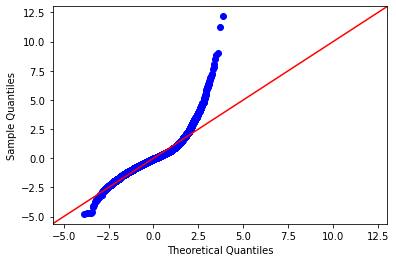

In [73]:
zip_residuals2 = zip_model2.resid
fig = sm.graphics.qqplot(zip_residuals2,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

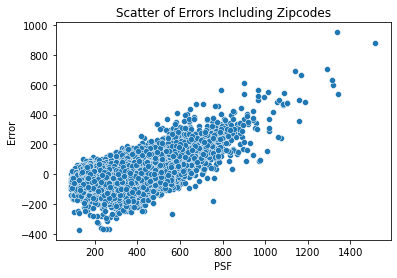

In [74]:
sns.scatterplot(y_train2,zip_residuals2)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('PSF')
plt.ylabel('Error');

## Log Transforming PSF for Zip Codes

In [75]:
zip_df_update2 = zip_df_update.copy()

In [76]:
zip_df_update2['psf'] = np.log(zip_df_update['psf'])

In [77]:
x_zip3 = zip_df_update2.drop('psf',axis=1)
y_zip3= zip_df_update2['psf']
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_zip3,y_zip3,test_size=0.2)
zip_model3 = model_log(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.7655198668258026
Test R2:  0.756323006808382
Train RMSE:  77.18340712713794
Test RMSE:  77.90060924878647


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     826.1
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:30   Log-Likelihood:                 2036.0
No. Observations:               17275   AIC:                            -3934.
Df Residuals:                   17206   BIC:                            -3399.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0333      0.017    297.260      0.000       5.000       5.067
bedrooms        -0.0671      0.002    -32.467      0.000      -0.071      -0.063
floors          -0.1289      0.005    -26.731      0.000      -0.138      -0.119
waterfront       0.6714      0.021     32.224      0.000       0.631       0.712
condition        0.0568      0.003     20.982      0.000       0.052       0.062
grade            0.0404      0.002     21.426      0.000       0.037       0.044
livtolot        -0.1093      0.009    -11.717      0.000      -0.128      -0.091
has_basement     0.2388      0.004     58.287      0.000       0.231       0.247
rec_reno         0.0989      0.011      9.232      0.000       0.078       0.120
zip_98004        1.0988      0.014     76.016      0.000       1.070       1.127
zip_98005        0.6869      0.019     35.845      0.000       0.649       0.724
zip_98006        0.6485      0.012     54.238      0.000       0.625       0.672
zip_98007        0.6382      0.021     31.069      0.000       0.598       0.678
zip_98008        0.6377      0.015     41.188      0.000       0.607       0.668
zip_98010        0.2252      0.024      9.233      0.000       0.177       0.273
zip_98011        0.3855      0.018     21.406      0.000       0.350       0.421
zip_98014        0.2903      0.022     13.201      0.000       0.247       0.333
zip_98019        0.2724      0.018     15.367      0.000       0.238       0.307
zip_98023       -0.0624      0.012     -5.324      0.000      -0.085      -0.039
zip_98024        0.4220      0.026     16.227      0.000       0.371       0.473
zip_98027        0.4997      0.013     38.284      0.000       0.474       0.525
zip_98028        0.3991      0.015     26.456      0.000       0.370       0.429
zip_98029        0.5965      0.014     41.816      0.000       0.569       0.624
zip_98033        0.7570      0.012     61.559      0.000       0.733       0.781
zip_98034        0.5153      0.011     45.385      0.000       0.493       0.538
zip_98038        0.1291      0.011     11.840      0.000       0.108       0.150
zip_98039        1.2316      0.035     35.626      0.000       1.164       1.299
zip_98040        0.8875      0.015     57.763      0.000       0.857       0.918
zip_98045        0.2927      0.018     16.720      0.000       0.258       0.327
zip_98052        0.5957      0.011     53.864      0.000       0.574       0.617
zip_98053        0.5026      0.013     38.430      0.000       0.477       0.528
zip_98055        0.1078      0.016      6.890      0.000       0.077       0.138
zip_98056        0.2965      0.013     23.450      0.000       0.272       0.321
zip_98058        0.1189      0.012      9.773      0.000       0.095       0.143
zip_98059        0.2844      0.012     23.418      0.000       0.261       0.308
zip_9

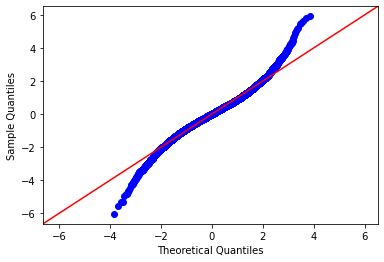

In [78]:
zip_residuals2 = zip_model3.resid
fig = sm.graphics.qqplot(zip_residuals2,dist=stats.norm,line='45',fit=True)

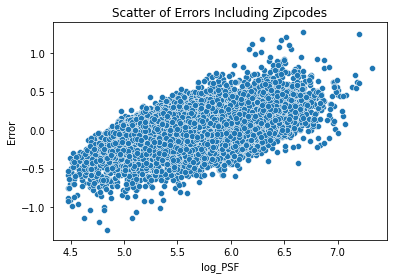

In [79]:
sns.scatterplot(y_train3,zip_residuals2)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared improved greatly to .76 after adding back zipcodes and log transforming PSF
* RMSE improved greatly as well to 77 PSF.  For reference, mean PSF is 315 PSF and STD is 147 PSF.
* Difference in RMSE is .072
* Residual normality distribution improved, but heavier tails
* Homoscedasticity improved as well, but still does not appear random for larger/smaller PSF

# Iteration 4: Dropping Outliers

* Continuing to improve on the log transformed model with zipcodes

## Modifying Modeling for Outliers

In [80]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [81]:
def model_outlier(X_train, X_test, y_train, y_test):
    # remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

## Model Summary

In [82]:
x_zip4 = zip_df_update2.drop('psf',axis=1)
y_zip4= zip_df_update2['psf']
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_zip4,y_zip4,test_size=0.2)

In [83]:
zip_model4 = model_outlier(x_train4,x_test4,y_train4,y_test4);

Train R2:  0.7644253181401592
Test R2:  0.7545910177574884
Train RMSE:  74.89493768827342
Test RMSE:  75.2465430043829


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     819.7
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:31   Log-Likelihood:                 2143.8
No. Observations:               17247   AIC:                            -4150.
Df Residuals:                   17178   BIC:                            -3614.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0400      0.017    297.085      0.000       5.007       5.073
bedrooms        -0.0685      0.002    -33.363      0.000      -0.073      -0.065
floors          -0.1225      0.005    -25.531      0.000      -0.132      -0.113
waterfront       0.6593      0.021     31.232      0.000       0.618       0.701
condition        0.0566      0.003     20.791      0.000       0.051       0.062
grade            0.0398      0.002     21.179      0.000       0.036       0.043
livtolot        -0.1091      0.009    -11.889      0.000      -0.127      -0.091
has_basement     0.2379      0.004     58.402      0.000       0.230       0.246
rec_reno         0.0950      0.011      8.894      0.000       0.074       0.116
zip_98004        1.0766      0.014     74.749      0.000       1.048       1.105
zip_98005        0.6791      0.019     35.142      0.000       0.641       0.717
zip_98006        0.6513      0.012     54.502      0.000       0.628       0.675
zip_98007        0.6208      0.020     30.393      0.000       0.581       0.661
zip_98008        0.6311      0.015     41.746      0.000       0.601       0.661
zip_98010        0.1820      0.024      7.462      0.000       0.134       0.230
zip_98011        0.3953      0.018     22.007      0.000       0.360       0.430
zip_98014        0.2579      0.022     11.579      0.000       0.214       0.302
zip_98019        0.2614      0.018     14.704      0.000       0.227       0.296
zip_98023       -0.0640      0.012     -5.519      0.000      -0.087      -0.041
zip_98024        0.3818      0.028     13.613      0.000       0.327       0.437
zip_98027        0.4825      0.013     38.102      0.000       0.458       0.507
zip_98028        0.3832      0.015     25.691      0.000       0.354       0.412
zip_98029        0.5912      0.014     41.602      0.000       0.563       0.619
zip_98033        0.7543      0.012     60.527      0.000       0.730       0.779
zip_98034        0.5103      0.011     45.714      0.000       0.488       0.532
zip_98038        0.1164      0.011     10.551      0.000       0.095       0.138
zip_98039        1.2272      0.034     36.568      0.000       1.161       1.293
zip_98040        0.8766      0.016     56.153      0.000       0.846       0.907
zip_98045        0.2868      0.017     17.167      0.000       0.254       0.320
zip_98052        0.5945      0.011     53.351      0.000       0.573       0.616
zip_98053        0.4946      0.013     38.613      0.000       0.470       0.520
zip_98055        0.1141      0.015      7.543      0.000       0.084       0.144
zip_98056        0.2875      0.013     22.364      0.000       0.262       0.313
zip_98058        0.1183      0.012      9.964      0.000       0.095       0.142
zip_98059        0.2762      0.012     23.101      0.000       0.253       0.300
zip_9

## Assumptions Check

### Normality

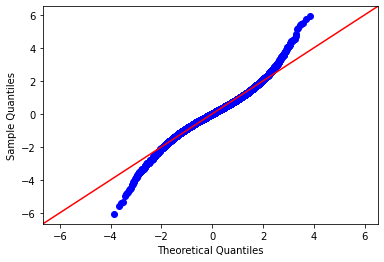

In [84]:
zip_residuals4 = zip_model4.resid
fig = sm.graphics.qqplot(zip_residuals4,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

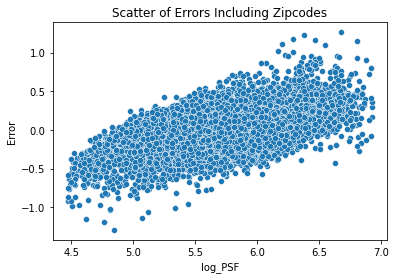

In [85]:
sns.scatterplot(y_train4,zip_residuals4)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* Model removing outliers after log transformation did not improve overall

# Iteration 5: Dropping Outliers before Log Transform

## Updating Model Function

In [86]:
def model_outlier_log(X_train, X_test, y_train, y_test):
    # remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
    # log transform PSF
    y_train = np.log(y_train)
    y_test = np.log(y_test)
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

In [87]:
zip_out_log = zip_df_update.copy()

## Model Summary

In [88]:
x_zol = zip_out_log.drop('psf',axis=1)
y_zol= zip_out_log['psf']
x_train_zol, x_test_zol, y_train_zol, y_test_zol = train_test_split(x_zol,y_zol,test_size=0.2)
zip_model_out_log = model_outlier_log(x_train_zol,x_test_zol,y_train_zol,y_test_zol);

Train R2:  0.7486582923675782
Test R2:  0.7566411094920245
Train RMSE:  66.3237406649936
Test RMSE:  65.23783240447305


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     732.7
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:31   Log-Likelihood:                 2537.3
No. Observations:               16797   AIC:                            -4937.
Df Residuals:                   16728   BIC:                            -4403.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0651      0.017    297.131      0.000       5.032       5.099
bedrooms        -0.0656      0.002    -32.439      0.000      -0.070      -0.062
floors          -0.1171      0.005    -24.810      0.000      -0.126      -0.108
waterfront       0.5569      0.027     20.800      0.000       0.504       0.609
condition        0.0553      0.003     20.393      0.000       0.050       0.061
grade            0.0345      0.002     18.219      0.000       0.031       0.038
livtolot        -0.1022      0.009    -11.163      0.000      -0.120      -0.084
has_basement     0.2276      0.004     56.729      0.000       0.220       0.235
rec_reno         0.0927      0.011      8.566      0.000       0.071       0.114
zip_98004        1.0143      0.016     64.509      0.000       0.983       1.045
zip_98005        0.6821      0.019     36.369      0.000       0.645       0.719
zip_98006        0.6420      0.012     54.517      0.000       0.619       0.665
zip_98007        0.6324      0.020     31.016      0.000       0.592       0.672
zip_98008        0.6391      0.015     42.873      0.000       0.610       0.668
zip_98010        0.1980      0.024      8.391      0.000       0.152       0.244
zip_98011        0.4040      0.017     23.602      0.000       0.370       0.438
zip_98014        0.2969      0.021     14.025      0.000       0.255       0.338
zip_98019        0.2577      0.017     14.935      0.000       0.224       0.292
zip_98023       -0.0625      0.011     -5.578      0.000      -0.084      -0.041
zip_98024        0.4188      0.026     16.410      0.000       0.369       0.469
zip_98027        0.4918      0.012     39.813      0.000       0.468       0.516
zip_98028        0.3905      0.015     26.578      0.000       0.362       0.419
zip_98029        0.5854      0.014     41.445      0.000       0.558       0.613
zip_98033        0.7273      0.012     58.372      0.000       0.703       0.752
zip_98034        0.5173      0.011     47.340      0.000       0.496       0.539
zip_98038        0.1177      0.011     11.112      0.000       0.097       0.138
zip_98039        1.1711      0.050     23.635      0.000       1.074       1.268
zip_98040        0.8513      0.016     53.672      0.000       0.820       0.882
zip_98045        0.2867      0.016     17.797      0.000       0.255       0.318
zip_98052        0.5985      0.011     55.515      0.000       0.577       0.620
zip_98053        0.4943      0.013     39.276      0.000       0.470       0.519
zip_98055        0.0934      0.015      6.224      0.000       0.064       0.123
zip_98056        0.2915      0.012     23.351      0.000       0.267       0.316
zip_98058        0.1221      0.012     10.481      0.000       0.099       0.145
zip_98059        0.2820      0.011     24.675      0.000       0.260       0.304
zip_9

## Assumptions Check

### Normality

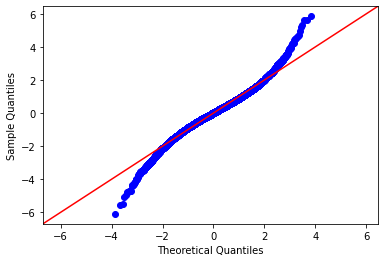

In [89]:
zip_residuals_out_log = zip_model_out_log.resid
fig = sm.graphics.qqplot(zip_residuals_out_log,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

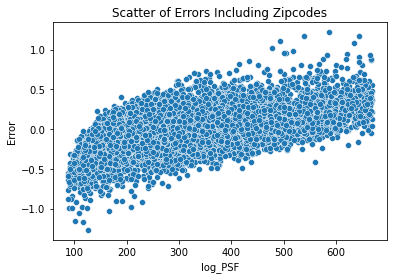

In [90]:
sns.scatterplot(y_train_zol,zip_residuals_out_log)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R-Squared slightly worse, but RMSE improved.
* Normality appears to be the same
* Homoscedasticity appears to improve as well
* Want to keep the expensive/luxury homes into account in the model rather than removing them

# Iteration 6: Cubed Root Transformation of PSF

## Modifying Model Function

In [91]:
def model_recip(X_train, X_test, y_train, y_test):

    
    # Cubed Root Transform to PSF
    y_train = y_train ** (1/3)
    y_test = y_test ** (1/3)
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_3 = linreg.predict(X_train)
    y_hat_test_3 = linreg.predict(X_test)

    # reverse cubed root transform
    y_train_rev = y_train ** 3
    y_test_rev = y_test ** 3
    y_hat_train = y_hat_train_3 ** 3
    y_hat_test = y_hat_test_3 ** 3
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

## Model Summary

In [92]:
zip_recip = zip_df_update.copy()

In [93]:
x_rec = zip_recip.drop('psf',axis=1)
y_rec= zip_recip['psf']
x_train_rec, x_test_rec, y_train_rec, y_test_rec = train_test_split(x_rec,y_rec,test_size=0.2)
zip_model_rec = model_recip(x_train_rec,x_test_rec,y_train_rec,y_test_rec);

Train R2:  0.7564901787673399
Test R2:  0.7657075231320205
Train RMSE:  77.75103124211071
Test RMSE:  74.66499518301998


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     786.1
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:32   Log-Likelihood:                -12238.
No. Observations:               17275   AIC:                         2.461e+04
Df Residuals:                   17206   BIC:                         2.515e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.2837      0.039    135.703      0.000       5.207       5.360
bedrooms        -0.1473      0.005    -31.185      0.000      -0.157      -0.138
floors          -0.2862      0.011    -26.085      0.000      -0.308      -0.265
waterfront       1.7088      0.046     36.837      0.000       1.618       1.800
condition        0.1367      0.006     21.974      0.000       0.125       0.149
grade            0.0900      0.004     20.882      0.000       0.082       0.098
livtolot        -0.2479      0.021    -11.696      0.000      -0.289      -0.206
has_basement     0.5251      0.009     56.202      0.000       0.507       0.543
rec_reno         0.2505      0.025     10.162      0.000       0.202       0.299
zip_98004        2.4820      0.034     73.750      0.000       2.416       2.548
zip_98005        1.4341      0.045     31.601      0.000       1.345       1.523
zip_98006        1.3922      0.027     51.208      0.000       1.339       1.445
zip_98007        1.2970      0.046     28.186      0.000       1.207       1.387
zip_98008        1.3386      0.034     39.096      0.000       1.272       1.406
zip_98010        0.4755      0.057      8.323      0.000       0.364       0.587
zip_98011        0.7918      0.041     19.233      0.000       0.711       0.872
zip_98014        0.5348      0.052     10.341      0.000       0.433       0.636
zip_98019        0.5296      0.041     12.997      0.000       0.450       0.609
zip_98023       -0.1437      0.027     -5.396      0.000      -0.196      -0.092
zip_98024        0.8374      0.062     13.600      0.000       0.717       0.958
zip_98027        0.9745      0.030     32.437      0.000       0.916       1.033
zip_98028        0.7655      0.034     22.419      0.000       0.699       0.832
zip_98029        1.2208      0.033     36.863      0.000       1.156       1.286
zip_98033        1.6404      0.028     59.202      0.000       1.586       1.695
zip_98034        1.0561      0.026     41.372      0.000       1.006       1.106
zip_98038        0.2714      0.025     10.998      0.000       0.223       0.320
zip_98039        2.8487      0.081     35.151      0.000       2.690       3.008
zip_98040        1.9612      0.035     56.109      0.000       1.893       2.030
zip_98045        0.5854      0.039     15.118      0.000       0.509       0.661
zip_98052        1.2291      0.025     48.658      0.000       1.180       1.279
zip_98053        1.0014      0.029     34.385      0.000       0.944       1.059
zip_98055        0.2486      0.036      6.969      0.000       0.179       0.318
zip_98056        0.5621      0.029     19.309      0.000       0.505       0.619
zip_98058        0.2281      0.028      8.279      0.000       0.174       0.282
zip_98059        0.5514      0.028     19.892      0.000       0.497       0.606
zip_9

## Assumptions

### Normality

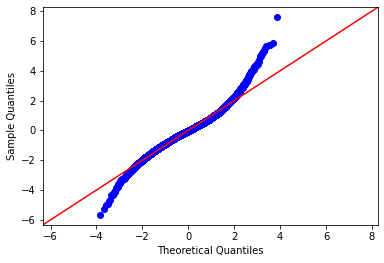

In [94]:
zip_residuals_rec = zip_model_rec.resid
fig = sm.graphics.qqplot(zip_residuals_rec,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

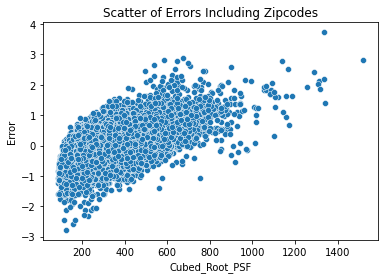

In [95]:
sns.scatterplot(y_train_rec,zip_residuals_rec)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('Cubed_Root_PSF')
plt.ylabel('Error');

## Findings

* No improvement overall in correcting the assumptions nor statistical values
* Log transform is a stronger transformation, expected weaker results from the cubed root

# Conclusion

## Model Summary of Log Transformed PSF including Zipcodes

* Best performing model from the iterations performed above

In [96]:
zip_df_update_final = zip_df_update.copy()
# Log Transform First
zip_df_update_final['psf'] = np.log(zip_df_update['psf'])

In [97]:
x_zip_f = zip_df_update_final.drop('psf',axis=1)
y_zip_f= zip_df_update_final['psf']
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_zip_f,y_zip_f,test_size=0.2)
zip_model_final = model_log(x_train_f,x_test_f,y_train_f,y_test_f);

Train R2:  0.7670264811943979
Test R2:  0.7502924388944007
Train RMSE:  77.174910944436
Test RMSE:  77.80167154049006


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     833.1
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:57:33   Log-Likelihood:                 2086.5
No. Observations:               17275   AIC:                            -4035.
Df Residuals:                   17206   BIC:                            -3500.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0415      0.017    297.087      0.000       5.008       5.075
bedrooms        -0.0686      0.002    -33.472      0.000      -0.073      -0.065
floors          -0.1256      0.005    -26.089      0.000      -0.135      -0.116
waterfront       0.6806      0.020     34.294      0.000       0.642       0.720
condition        0.0590      0.003     21.696      0.000       0.054       0.064
grade            0.0391      0.002     20.796      0.000       0.035       0.043
livtolot        -0.1118      0.009    -12.116      0.000      -0.130      -0.094
has_basement     0.2392      0.004     58.458      0.000       0.231       0.247
rec_reno         0.1014      0.010      9.680      0.000       0.081       0.122
zip_98004        1.0820      0.014     76.424      0.000       1.054       1.110
zip_98005        0.6765      0.020     34.657      0.000       0.638       0.715
zip_98006        0.6628      0.012     54.988      0.000       0.639       0.686
zip_98007        0.6435      0.021     30.487      0.000       0.602       0.685
zip_98008        0.6373      0.015     41.587      0.000       0.607       0.667
zip_98010        0.1874      0.026      7.327      0.000       0.137       0.238
zip_98011        0.3905      0.017     22.338      0.000       0.356       0.425
zip_98014        0.2690      0.022     12.210      0.000       0.226       0.312
zip_98019        0.2550      0.018     13.954      0.000       0.219       0.291
zip_98023       -0.0652      0.012     -5.606      0.000      -0.088      -0.042
zip_98024        0.4282      0.028     15.341      0.000       0.374       0.483
zip_98027        0.4835      0.013     38.243      0.000       0.459       0.508
zip_98028        0.3884      0.015     25.600      0.000       0.359       0.418
zip_98029        0.5936      0.014     41.668      0.000       0.566       0.622
zip_98033        0.7589      0.012     61.052      0.000       0.735       0.783
zip_98034        0.5144      0.011     45.930      0.000       0.492       0.536
zip_98038        0.1232      0.011     11.457      0.000       0.102       0.144
zip_98039        1.2255      0.035     35.146      0.000       1.157       1.294
zip_98040        0.8775      0.015     57.441      0.000       0.848       0.907
zip_98045        0.2859      0.017     16.842      0.000       0.253       0.319
zip_98052        0.5907      0.011     53.473      0.000       0.569       0.612
zip_98053        0.4897      0.013     37.871      0.000       0.464       0.515
zip_98055        0.1258      0.015      8.130      0.000       0.095       0.156
zip_98056        0.2760      0.013     21.502      0.000       0.251       0.301
zip_98058        0.1249      0.012     10.346      0.000       0.101       0.149
zip_98059        0.2859      0.012     24.185      0.000       0.263       0.309
zip_9

### Normality

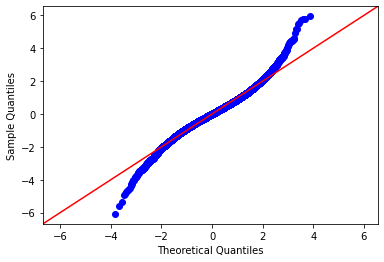

In [98]:
zip_residuals_f = zip_model_final.resid
fig = sm.graphics.qqplot(zip_residuals_f,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

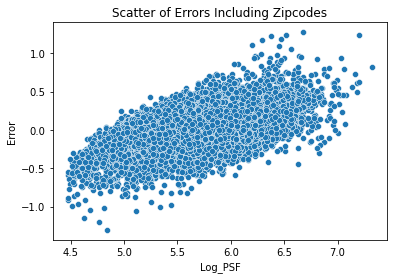

In [99]:
sns.scatterplot(y_train_f,zip_residuals_f)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('Log_PSF')
plt.ylabel('Error');

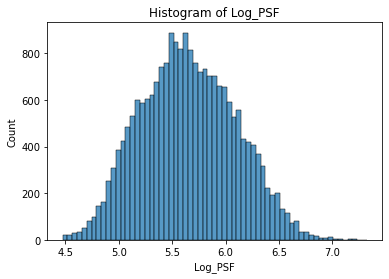

In [100]:
sns.histplot(y_zip_f);
plt.title("Histogram of Log_PSF")
plt.xlabel("Log_PSF");

### High Effects on log PSF

In [101]:
((np.e**(zip_model_final.params.sort_values(ascending=False))-1)*100).head(10)

Intercept    15369.638161
zip_98039      240.595669
zip_98004      195.055631
zip_98119      192.293073
zip_98112      189.648928
zip_98102      188.099862
zip_98109      184.765443
zip_98105      164.704877
zip_98107      160.308879
zip_98199      146.655336
dtype: float64

### Lowest and Negative Effects on log PSF

In [102]:
((np.e**(zip_model_final.params.sort_values(ascending=False))-1)*100).tail(10)

zip_98148    10.712793
rec_reno     10.672910
zip_98188     8.973532
zip_98168     6.950062
condition     6.079500
grade         3.988295
zip_98023    -6.316154
bedrooms     -6.629033
livtolot    -10.575431
floors      -11.802987
dtype: float64

In [112]:
# Waterfront Coefficient
(np.e**.6808-1)*100

97.54574662255773

In [113]:
# Basement COefficient
(np.e**.2392-1)*100

27.02325576924174

## Visualizing Zipcode Locations

In [105]:
def high_test(zipcode):
    high_zips = [98039,98004,98109,98119,98112,98102,98105]
    low_zips = [98148,98188,98168,98023,98001]
    if zipcode in high_zips:
        return 2
    if zipcode in low_zips:
        return 0
    else:
        return 1

In [106]:
geo_zips = df.copy()

In [107]:
geo_zips['high_zip'] = geo_zips['zipcode'].apply(high_test)

In [108]:
geo_zips.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,high_zip
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1


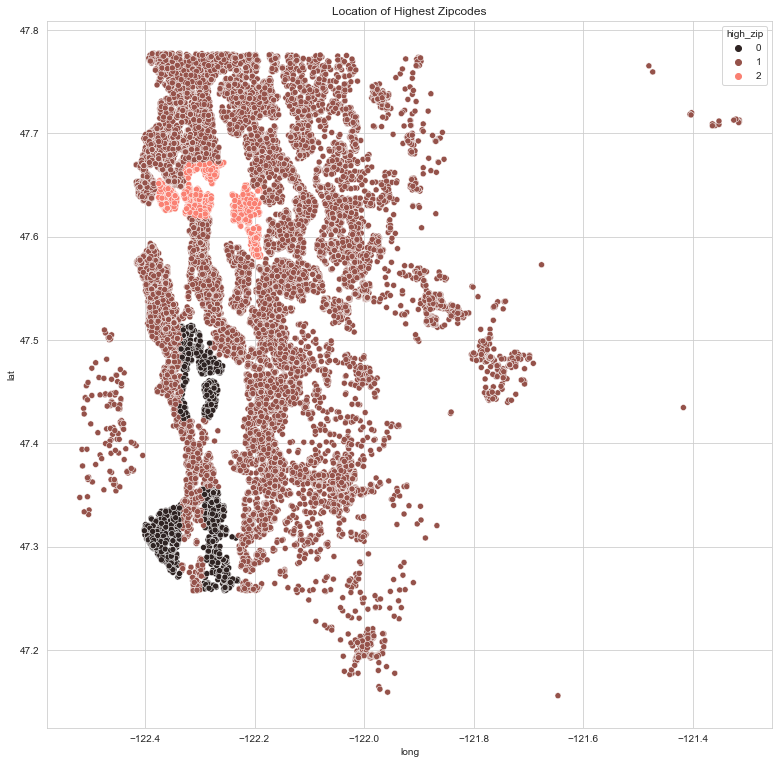

In [109]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(13,13))

sns.scatterplot(y = geo_zips.lat, x = geo_zips.long, hue=geo_zips['high_zip'], ax=ax, palette ='dark:salmon')
ax.set_title('Location of Highest Zipcodes');


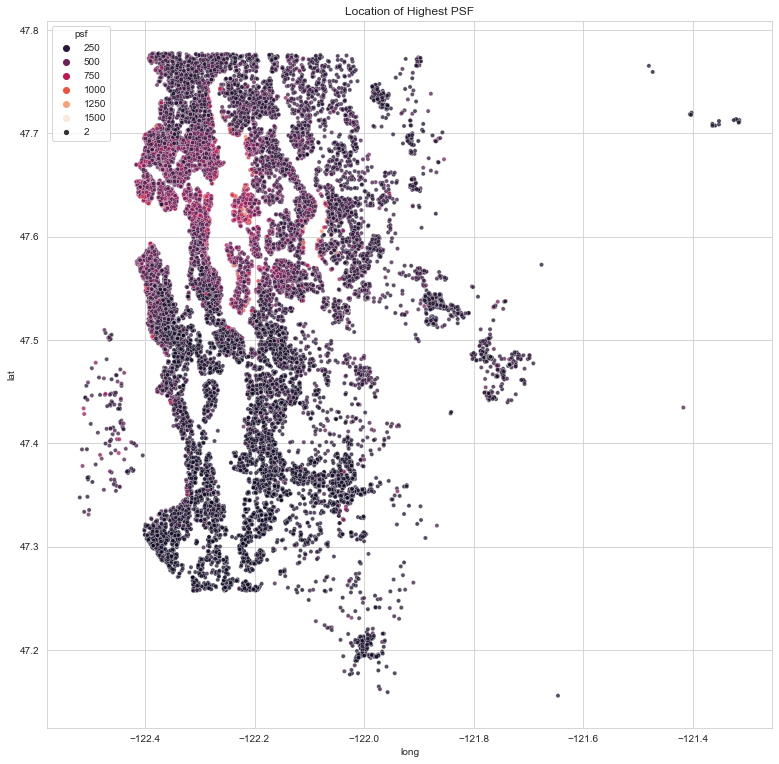

In [110]:
geo_zips['psf'] = geo_zips['price'] / geo_zips['sqft_above']

fig, ax = plt.subplots(figsize=(13,13))
sns.scatterplot(x=geo_zips.long,y=geo_zips.lat, hue=geo_zips.psf, palette='rocket', alpha=.75, size =2)
ax.set_title('Location of Highest PSF');

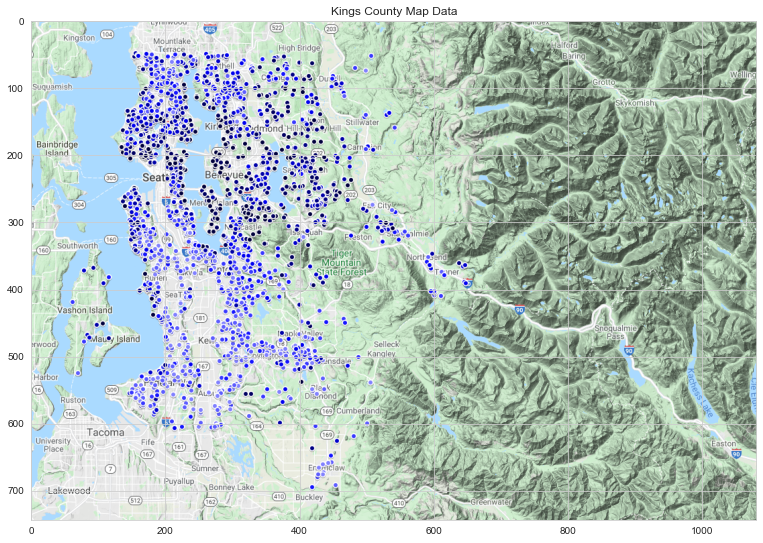

In [111]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(13,13))
img = mpimg.imread('data/zoomed_map.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

## Final Results and Findings:


*  R Squared: 0.76, Features explain 76% of the variation in the log of PSF
*  RMSE: 77 PSF.  For reference, mean PSF is 315 PSF and STD is 147 PSF.
*  Difference between Train and Test RMSE: .63
*  Residuals are almost normally distributed, but they have heavy tails indicating that large errors are more likely for extreme values
*  Model is heteroscedastic, smaller PSF are overpredicted while larger PSF are underpredicted.  Likely due to the inclusion of luxury homes in the data<br>

___
*  Highest effect on PSF is location:
    1.  PSF for similar homes are 146 to 240% higher in areas closer to the mid-northern area of the city compared to our base line zipcode 98001 located in the southern area
    2.  PSF for similar homes are 7% higher in areas near our base line zipcode of 98001 and around the airports
        a. Likely due to the effects of noise, or traffic
    3.  PSF for similar homes with a waterfront are 97% higher than homes without a waterfront 
___
*  Home features do not have as high impact on PSF
    1.  PSF for homes with basements are 27% higher than homes without
    2.  Homes with renovations within the last 27 years have 10.7% higher PSF than homes without
    3.  A 1 unit increase in the condition or grade of the home leads to 6% increase in PSF
    4.  A 1 bedroom increase in similar homes leads to a 6.6% decrease in PSF
        a. Likely due to a preference for open concepts or larger bedrooms
    5.  A 1 unit increase to the ratio of living square feet to lot size square feet leads to a 10.6% decrease in PSF
        a. A larger lot for similar sized homes is preferable
    6.  The existence of 1 additional floor leads to a 11.8% decrease in PSF
        a. Climbing more stairs around your home is less desirable